Group 1 Center: [0.41147258 0.39633761]
Group 2 Center: [0.20715107 0.19301443]


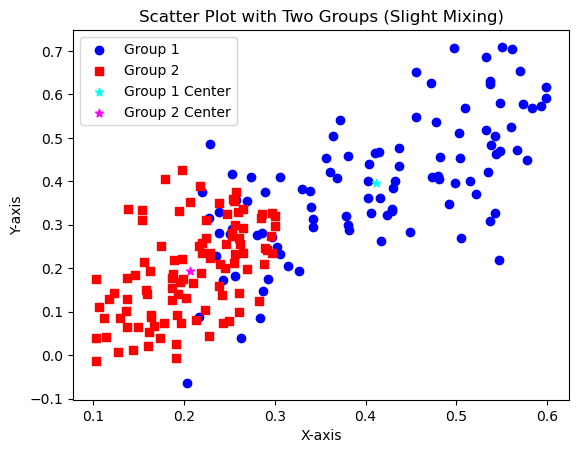

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define group sizes
group1_size = 100
group2_size = 100

# Generate base x values for each group with some separation
group1_x = np.random.rand(group1_size) * 0.4 + 0.2
group2_x = np.random.rand(group2_size) * 0.2 + 0.1

# Generate y values with some random noise
group1_y = group1_x + np.random.randn(group1_size) * 0.1
group2_y = group2_x + np.random.randn(group2_size) * 0.1

# Calculate the center (mean) of each group
group1_center = np.mean([group1_x, group1_y], axis=1)
group2_center = np.mean([group2_x, group2_y], axis=1)

# Print the center coordinates for each group
print("Group 1 Center:", group1_center)
print("Group 2 Center:", group2_center)

# Create the scatter plot with different markers and colors
plt.scatter(group1_x, group1_y, marker='o', color='blue', label='Group 1')
plt.scatter(group2_x, group2_y, marker='s', color='red', label='Group 2')

# Plot center points with different markers
plt.scatter(group1_center[0], group1_center[1], marker='*', color='cyan', label='Group 1 Center')
plt.scatter(group2_center[0], group2_center[1], marker='*', color='magenta', label='Group 2 Center')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Two Groups (Slight Mixing)')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [5]:
# Calculate the line going through both centers and transform the points accordingly

# Define the equation of the line through the centers (y = mx + b)
m = (group2_center[1] - group1_center[1]) / (group2_center[0] - group1_center[0])
b = group1_center[1] - m * group1_center[0]

# Generate x values for plotting the line
line_x = np.linspace(min(group1_x.min(), group2_x.min()), max(group1_x.max(), group2_x.max()), 100)

# Calculate corresponding y values for the line
line_y = m * line_x + b

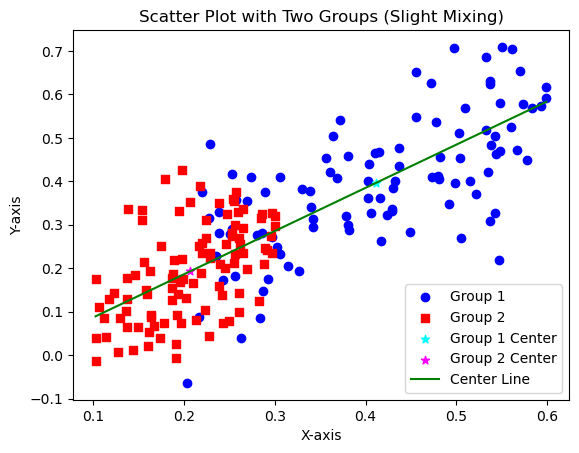

In [6]:
# plot the line before transformation

# Create the scatter plot with different markers and colors
plt.scatter(group1_x, group1_y, marker='o', color='blue', label='Group 1')
plt.scatter(group2_x, group2_y, marker='s', color='red', label='Group 2')

# Plot center points with different markers
plt.scatter(group1_center[0], group1_center[1], marker='*', color='cyan', label='Group 1 Center')
plt.scatter(group2_center[0], group2_center[1], marker='*', color='magenta', label='Group 2 Center')

# Plot the line
plt.plot(line_x, line_y, color='green', label='Center Line')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Two Groups (Slight Mixing)')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [7]:
# Define a helper function to find the parametric equation of the line
def line_equation(x):
    return m * x + b

In [8]:
plt.scatter(x1_tr,y1_tr)

NameError: name 'x1_tr' is not defined

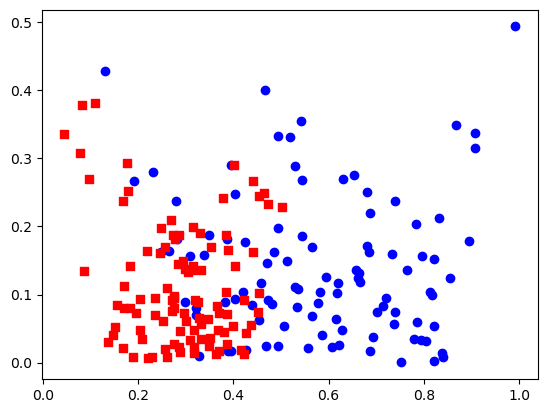

In [9]:
# transformation of all GR1 points onto line

# First find projection on the the line itself
pts_1 = np.array([group1_x, group1_y])
# Calculate the x-coordinate of the projection point
proj1_x = pts_1[0] - (pts_1[1] - line_equation(pts_1[0])) / (m**2 + 1)
# Calculate the corresponding y-coordinate using the line equation
proj1_y = line_equation(proj1_x)
# new x-coordinate is the distance from x = 0 point to projected point on line
x1_tr = np.sqrt(proj1_x**2 + (proj1_y-b)**2)
# new y-coordinate is the distance from previous point to projected point on line
y1_tr = np.sqrt((proj1_x-pts_1[0])**2 + (proj1_y-pts_1[1])**2)

# transformation of all GR2 points onto line

# First find projection on the the line itself
pts_2 = np.array([group2_x, group2_y])
# Calculate the x-coordinate of the projection point
proj2_x = pts_2[0] - (pts_2[1] - line_equation(pts_2[0])) / (m**2 + 1)
# Calculate the corresponding y-coordinate using the line equation
proj2_y = line_equation(proj2_x)
# new x-coordinate is the distance from x = 0 point to projected point on line
x2_tr = np.sqrt(proj2_x**2 + (proj2_y-b)**2)
# new y-coordinate is the distance from previous point to projected point on line
y2_tr = np.sqrt((proj2_x-pts_2[0])**2 + (proj2_y-pts_2[1])**2)

plt.scatter(x1_tr, y1_tr, marker='o', color='blue', label='Group1')
plt.scatter(x2_tr, y2_tr, marker='s', color='red', label='Group2')

(array([ 1.,  3.,  2.,  0.,  4.,  7.,  5.,  3.,  5.,  8., 13., 10.,  7.,
         5., 10.,  4.,  4.,  6.,  2.,  1.]),
 array([0.04504337, 0.06786427, 0.09068518, 0.11350608, 0.13632698,
        0.15914788, 0.18196878, 0.20478968, 0.22761058, 0.25043148,
        0.27325238, 0.29607329, 0.31889419, 0.34171509, 0.36453599,
        0.38735689, 0.41017779, 0.43299869, 0.45581959, 0.47864049,
        0.50146139]),
 <BarContainer object of 20 artists>)

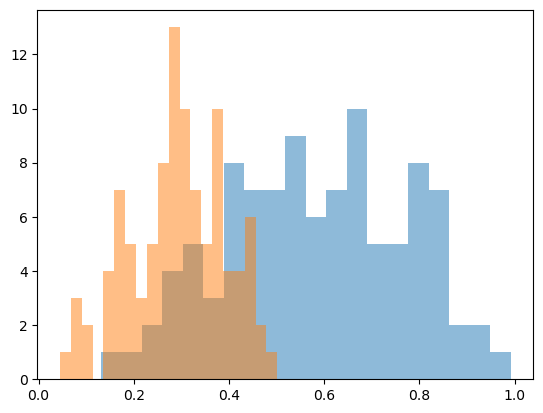

In [16]:
# plot the overlapping histrograms
bins = 20

plt.hist(x1_tr, bins, alpha=0.5, label='Group 1')
plt.hist(x2_tr, bins, alpha=0.5, label='Group 2')

In [17]:
# Fit normal distributions to histograms

from scipy import stats

mu_1, sg_1 = stats.norm.fit(x1_tr)
cts_1, bcnt_1 = np.histogram(x1_tr, bins=bins)
bcnt_1_corr = (bcnt_1[1:]+bcnt_1[:-1])/2
pdf_1 = stats.norm.pdf(bcnt_1_corr, mu_1, sg_1)

mu_2, sg_2 = stats.norm.fit(x2_tr)
cts_2, bcnt_2 = np.histogram(x2_tr, bins=bins)
bcnt_2_corr = (bcnt_2[1:]+bcnt_1[:-1])/2
pdf_2 = stats.norm.pdf(bcnt_2_corr, mu_2, sg_2)

ConversionError: Failed to convert value(s) to axis units: '8'

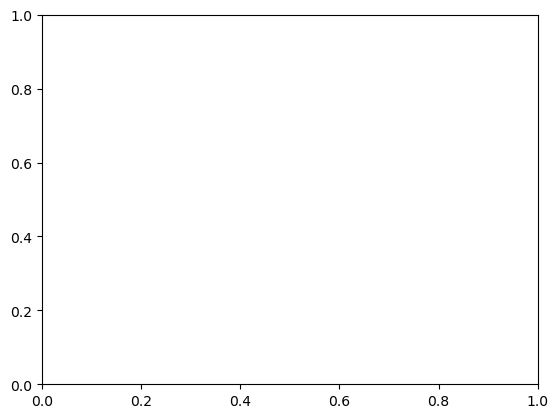

In [21]:
# Plot the histogram bars
plt.bar(bcnt_1_corr, cts_1, alpha=0.1, color='blue', label='Group 1')
plt.bar(bcnt_2_corr, cts_2, alpha=0.1, color='red', label='Group 2')

# Plot the fitted normal distribution PDF curve
plt.plot(bcnt_1_corr, pdf_1, 'b-', label='Normal Distribution (Gr 1)')
plt.plot(bcnt_2_corr, pdf_2, 'r-', label='Normal Distribution (Gr 2)')

# Add labels and title
plt.title('Histogram Fit with Normal Distribution')

# Add legend
plt.legend()

In [12]:
# separation in t-test (equal variances) or Welsh-test (unequal variances):

# Perform the t-test with equal variances assumption
t_statistic, p_value = stats.ttest_ind(x1_tr, x2_tr, equal_var=True)

# Print the results
print("T-statistic:", t_statistic)
print("p-value:", p_value)

# Perform the Welch's t-test for unequal variances
t_welch, p_welch = stats.ttest_ind(x1_tr, x2_tr, equal_var=False)
print("Welch's T-statistic:", t_welch)
print("Welch's p-value:", p_welch)


T-statistic: 13.465618081915576
p-value: 9.09823937586909e-30
Welch's T-statistic: 13.465618081915576
Welch's p-value: 1.1928262690346285e-27


In [1]:
cd

C:\Users\svw191
